# Predict the Critical Temperature of a Superconductor with Random Forest
This notebook will reproduce and improve the Random Forest results of `predict_tc` in the Python language.

In [ ]:
# Install `pyCHNOSZ` if not installed already.
!pip install pyCHNOSZ

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pyCHNOSZ
from xgboost import XGBRegressor
from load_data import load_and_split

Warning message:
package ‘methods’ was built under R version 4.1.3 
During startup - Warning messages:
1: package ‘datasets’ was built under R version 4.1.3 
2: package ‘utils’ was built under R version 4.1.3 
3: package ‘grDevices’ was built under R version 4.1.3 
4: package ‘graphics’ was built under R version 4.1.3 
5: package ‘stats’ was built under R version 4.1.3 


Since the original data for the superconducting materials list obtained from [Japan's National Institute for Materials Science (NIMS)](http://supercon.nims.go.jp/index_en.html) is no longer available, the preprocessing steps outlined cannot be reproduced.

In [23]:
training_X, training_y, testing_X, testing_y = load_and_split()

Data Shape: (21263, 82)
Training Features Shape: (14033, 81)
Training Labels Shape: (14033, 1)
Testing Features Shape: (7230, 81)
Testing Labels Shape: (7230, 1)


The next prediction will be done with xgboost.

In [10]:
xgb_model = XGBRegressor(n_estimators=2500)
xgb_model.fit(training_X, training_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

Score: 0.9185095101865176


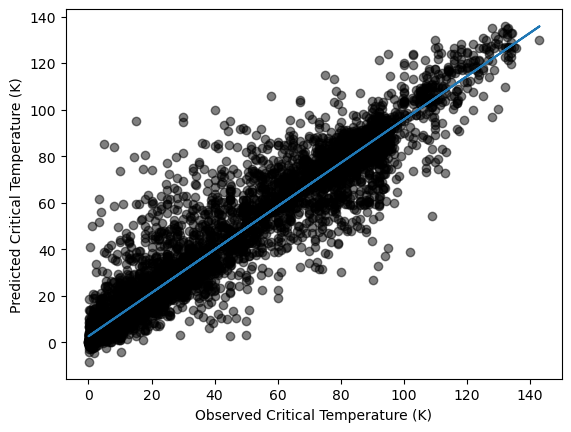

In [11]:
# Generates prediction using xgboost.
prediction_xgb = xgb_model.predict(testing_X)

print(f"Score: {xgb_model.score(testing_X, testing_y)}")

# Plot observed temperatures vs predicted temperatures with scatter plot.
plt.scatter(testing_y, prediction_xgb, color=(0, 0, 0, 0.5))
plt.xlabel("Observed Critical Temperature (K)")
plt.ylabel("Predicted Critical Temperature (K)")

# Plot linear trendline
z = np.polyfit(testing_y.ravel(), prediction_xgb, 1)
p = np.poly1d(z)
plt.plot(testing_y, p(testing_y))

plt.show()